# Descripción del proyecto

Formamos parte del departamento analitico de Y.Afisha, nuestra tarea es ayudar a optimizar los gastos de marketing.

Actualmente tenemos:

* registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
* archivo de volcado con todos los pedidos del período;
* estadísticas de gastos de marketing.

Lo que investigaremos será:

* cómo la gente usa el producto;
* cuándo empiezan a comprar;
* cuánto dinero trae cada cliente;
* cuándo pagan.

# Descripción de los datos

La tabla `visits` (registros del servidor con datos sobre las visitas al sitio web):

* `Uid`: identificador único del usuario;
* `Device`: dispositivo del usuario;
* `Start Ts`: fecha y hora de inicio de la sesión;
* `End Ts`: fecha y hora de término de la sesión;
* `Source Id`: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La tabla `orders` (datos sobre pedidos):

* `Uid`: identificador único del usuario que realiza un pedido;
* `Buy Ts`: fecha y hora del pedido;
* `Revenue`: ingresos de Y.Afisha de este pedido.

La tabla `costs` (datos sobre gastos de marketing):
* `source_id`: identificador de la fuente de anuncios
* `dt`: fecha;
* `costs`: gastos en esta fuente de anuncios en este día.


# Pasos a seguir

* Paso 1. Inicialización: Abrir y estudiar la informacion general
* Paso 2. Preparar los datos para el análisis
* Paso 3. Análisis de los datos: Trazar graficos que muestren como difieren las siguientes metricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo.

  - Producto:
   - ¿Cuántas personas lo usan cada día, semana y mes?
   -¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
   -¿Cuál es la duración de cada sesión?
   - ¿Con qué frecuencia los usuarios y las usuarias regresan?

  - Ventas:

    - ¿Cuándo la gente empieza a comprar? 
    -¿Cuántos pedidos hacen durante un período de tiempo dado?
    -¿Cuál es el tamaño promedio de compra?
    -¿Cuánto dinero traen? (LTV)

  - Marketing:
   - ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)
   - ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?
   - ¿Cuán rentables eran las inversiones? (ROI)

* Paso 4. Conclusión










# Inicialización

Procederemos a importar los archivos y estudiar la información general de estos para saber como pre-procesarlos antes de proceder a analizarlos posteriormente.

In [1]:
#importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from math import ceil as math
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters

In [2]:
#Cargamos los archivos de datos
try:
  visits = pd.read_csv('/datasets/visits_log_us.csv')
except:
  visits = pd.read_csv('/content/visits_log_us.csv')

try:
  orders = pd.read_csv('/datasets/orders_log_us.csv')
except:
  orders = pd.read_csv('/content/orders_log_us.csv')

try:  
  costs = pd.read_csv('/datasets/costs_us.csv')
except:
  costs = pd.read_csv('/content/costs_us.csv')

### Estudiando datos de archivo de visitas

In [3]:
# previsualizar los datos cargados
visits.info()

# devolver las n filas superiores del dataframe
visits.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
#Visualizar estadisticas descriptivas
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [5]:
#validando si device es una columna categorica
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

* Los nombres de columna de la tabla de datos `visits` podría ser cambiado para mantener la homogeneidad (snake_case).
* Las columnas `End Ts` y `Start Ts` deben ser transformadas a datetime, `Source Id`	debería ser interger.
* La columna `Device` de la tabla de datos `visits` se podría cambiar al tipo de datos category para una mejor optimización de datos

### Estudiando datos de archivo de ordenes

In [6]:
# previsualizar los datos cargados
orders.info()

# devolver las n filas superiores del dataframe
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [7]:
#Visualizar estadisticas descriptivas
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


* La columna `Buy Ts` debe ser transformada a datatime.
* Los nombres de columna de la tabla de datos `orders` podría ser cambiado para mantener la homogeneidad (snake_case).

### Estudiando datos de archivo de costos

In [8]:
# previsualizar los datos cargados
costs.info()

# devolver las n filas superiores del dataframe
costs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [9]:
#Visualizar estadisticas descriptivas
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


* La columna `dt` debe ser transformada a datatime.
* Los nombres de columna de la tabla de datos `orders` podrían ser cambiados a unos más descriptivos.

# Preparar los datos para el análisis

Ahora que ya conocermos nuestros datos, podemos proceder a corregir los detalles detectados.

In [10]:
#modificamos los nombres de las columnas para nuestras tablas
visits = visits.rename(columns={'Device': 'device_type', 'End Ts':'end_date', 'Start Ts':'start_date', 'Source Id':'source_id','Uid':'user_id'})
orders = orders.rename(columns={'Buy Ts': 'order_date', 'Revenue':'revenue', 'Uid':'user_id' })
costs = costs.rename(columns={'dt': 'ad_date', 'costs':'ad_cost'})

#cambiando tipo de datos en visits
visits['device_type'] = visits['device_type'].astype('category')
visits['start_date'] = pd.to_datetime(visits['start_date'])
visits['end_date'] = pd.to_datetime(visits['end_date'])
#cambiando tipo de datos en costs
costs['ad_date'] = pd.to_datetime(costs['ad_date'])
#cambiando tipo de datos en orders
orders['order_date'] = pd.to_datetime(orders['order_date'])

In [11]:
#buscando duplicados
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


In [12]:
#buscando columnas nulas
visits.isnull().sum()
orders.isnull().sum()
costs.isnull().sum()

source_id    0
ad_date      0
ad_cost      0
dtype: int64

In [13]:
#eliminando duplicados
visits.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)
costs.drop_duplicates(inplace=True)

### **Conclusiones iniciales**

Hemos comprobado la información general de los conjuntos de datos `visits`, `orders` y `costs`. Al revisar los datos, pudimos ver que los datos están bastante limpios, sin grandes problemas ni discrepancias. Sin embargo, hay algunos detalles menores que procedimos a corregir:

* Convertimos los tipos de datos de algunas columnas de fecha a datetime.
* Se cambiaron los nombres de las columnas de los datasets para eliminar los espacios intermedios y que fueran más descriptivos.
* Comprobación de valores en blanco y duplicados.


# Análisis de los datos

Procederemos a trazar graficos que muestren como difieren las siguientes metricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo.

  - Producto:
   - ¿Cuántas personas lo usan cada día, semana y mes?
   -¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
   -¿Cuál es la duración de cada sesión?
   - ¿Con qué frecuencia los usuarios y las usuarias regresan?

  - Ventas:

    - ¿Cuándo la gente empieza a comprar? 
    -¿Cuántos pedidos hacen durante un período de tiempo dado?
    -¿Cuál es el tamaño promedio de compra?
    -¿Cuánto dinero traen? (LTV)

  - Marketing:
   - ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)
   - ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?
   - ¿Cuán rentables eran las inversiones? (ROI)

## **Producto**

### ¿Cuántas personas lo usan cada día, semana y mes?

In [14]:
#Añadimos las columnas de dias, semana y mes
visits['session_year'] = visits['start_date'].astype("datetime64[Y]")
visits['session_month'] = visits['start_date'].astype("datetime64[M]")
visits['session_week']  = visits['start_date'].astype("datetime64[W]")
visits['session_date'] = visits['start_date'].astype("datetime64[D]")

# Calculamos el DAU: número de usuarios activos diarios 
dau_total = visits.groupby('session_date').agg({'user_id':'nunique'}).reset_index()
dau_total.columns = ['session_date', 'users']
dau_mean = dau_total['users'].mean()

print('DAU: ' + str(dau_mean.round(decimals = 2)) + ' usuarios diarios')

# Calculamos el WAU: número de usuarios activos semanales
wau_total = visits.groupby('session_week').agg({'user_id':'nunique'}).reset_index()
wau_total.columns = ['session_week', 'users']
wau_mean = wau_total['users'].mean()
print('WAU: ' + str(wau_mean.round(decimals = 2)) + ' usuarios semanales')

# Calculamos el MAU: número de usuarios activos mensuales
mau_total = visits.groupby('session_month').agg({'user_id':'nunique'}).reset_index()
mau_total.columns = ['session_month', 'users']
mau_mean = mau_total['users'].mean()
print('MAU: ' + str(mau_mean.round(decimals = 2)) + ' usuarios mensuales')

DAU: 907.99 usuarios diarios
WAU: 5724.42 usuarios semanales
MAU: 23228.42 usuarios mensuales


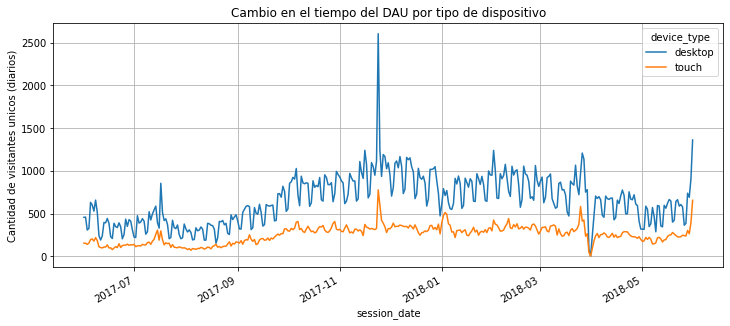

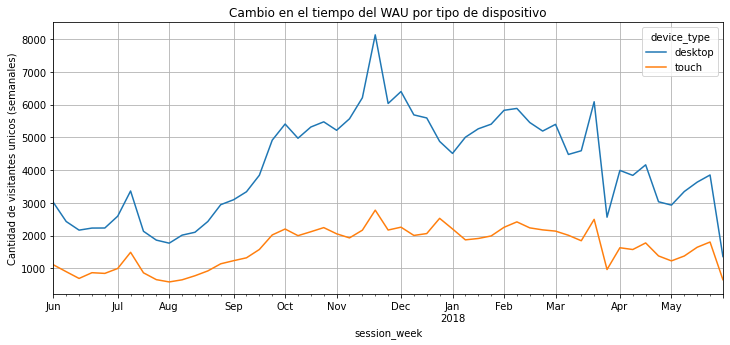

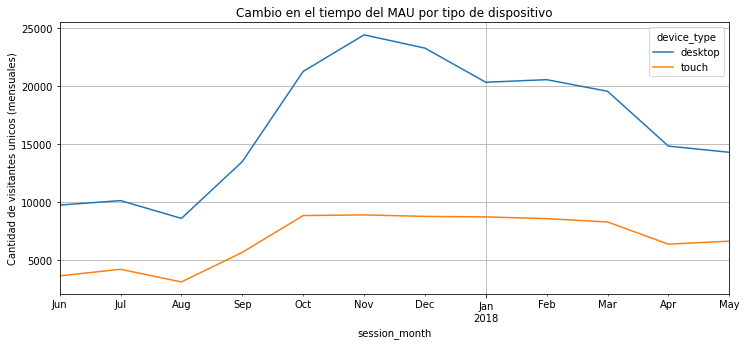

In [15]:
#Graficamos los usuarios diarios
visits.pivot_table(index = 'session_date', columns = 'device_type', values = 'user_id', aggfunc = 'nunique').plot(grid = True, figsize = (12,5))
plt.title('Cambio en el tiempo del DAU por tipo de dispositivo')
plt.ylabel('Cantidad de visitantes unicos (diarios)')
plt.show()

#Graficamos los usuarios semanales
visits.pivot_table(index = 'session_week', columns = 'device_type', values = 'user_id', aggfunc = 'nunique').plot(grid = True, figsize = (12,5))
plt.title('Cambio en el tiempo del WAU por tipo de dispositivo')
plt.ylabel('Cantidad de visitantes unicos (semanales)')
plt.show()

#Graficamos los usuarios mensuales
visits.pivot_table(index = 'session_month', columns = 'device_type', values = 'user_id', aggfunc = 'nunique').plot(grid = True, figsize = (12,5))
plt.title('Cambio en el tiempo del MAU por tipo de dispositivo')
plt.ylabel('Cantidad de visitantes unicos (mensuales)')
plt.show()

Separamos las actividad de nuestro dataset `visits` en actividad diaria, semanal y mensual. Agrupamos los datos por fecha de sesion, semana y mes y calculamos las medias para obtenet el DAU, WAU y MAU.

* Los resultados indicaron que diariamente Y.Afisha recibe diariamente `908` usuarios. 
* El 24 de noviembre del 2017 hubo un pico de visitas por lo que concluimos que Y.Afisha participo en black friday, mientras que el 31 de marzo del 2018 se dio el punto más bajo de visitas. 
* La cantidad de usuarios semanales es `5.724` mientras que los mensuales  es de `23.228`
* Podemos notar que ambos dispositivos disponibles (touch y desktop) tienen un comportamiento similar pero que `desktop` tiene muchos más usuarios que `touch`.

### ¿Cuántas sesiones hay por día?

In [16]:
#Calculando sesiones por dia
sessions_perday = visits.pivot_table(index = 'session_date', values = 'user_id', aggfunc= [('count', 'nunique')])
sessions_perday.columns = ['sessions','users']
sessions_perday_mean = sessions_perday['sessions'].mean()

print(str(sessions_perday_mean.round(decimals=2)) + ' sesiones por día')

987.36 sesiones por día


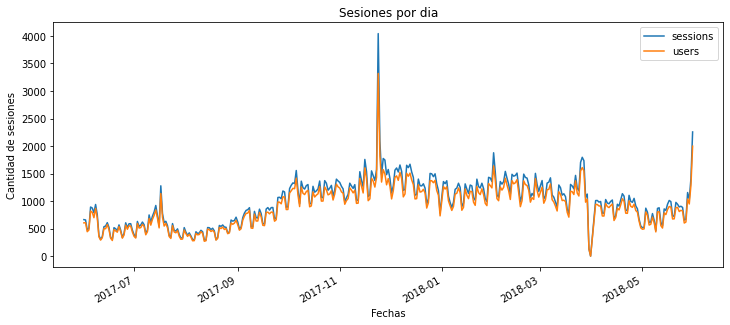

In [17]:
#GRaficando sesiones por dia
sessions_perday.plot(kind = 'line', figsize=(12,5))
plt.title('Sesiones por dia')
plt.xlabel('Fechas')
plt.ylabel('Cantidad de sesiones')
plt.show()

Para calcular las sesiones únicas por día, agrupamos los datos de visitas por fecha de sesión, contamos el número de usuarios únicos y el número de sesiones únicas. Es útil determinar el número de sesiones por uso al mes, ya que es un buen indicador de la frecuencia de uso de la aplicación.

* Los resultados indican que hay 987,36 sesiones únicas al día para Y.Afisha.
* No suele haber mucha diferencia entre la cantidad de sesiones total y los usuarios unicos que se conectan a la web, por lo que usualmente los usuarios de Y.Afisha acceden solo una vez al día a la web, exceptuando por días de alta demanda en los que pareciera haber una diferencia más notable ¿serán reingresos a la web para validar valores, concretar compras o fallas en el servidor por la alta carga?

### ¿Cuál es la duración de cada sesión?

In [18]:
#Calculando la longitud de las sesiones en segundos
visits['session_duration_sec'] = (visits['end_date'] - visits['start_date']).dt.seconds
length_per_session = visits['session_duration_sec'].median()
print("Longitud por sesión: " + str(length_per_session.round(decimals=2)) + " segundos")

Longitud por sesión: 300.0 segundos


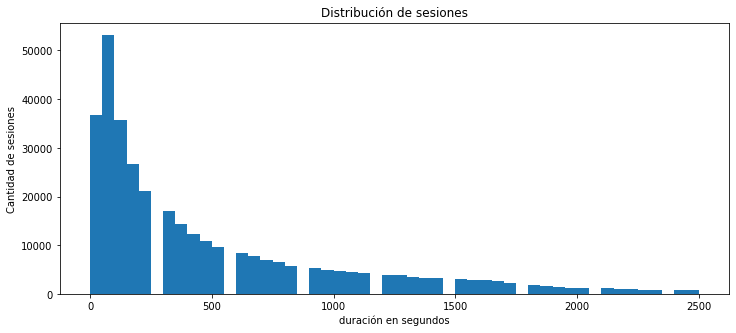

In [19]:
plt.figure(figsize=(12,5))
plt.hist(visits['session_duration_sec'],range=[0,2500],bins=50)
plt.title('Distribución de sesiones')
plt.xlabel('duración en segundos')
plt.ylabel('Cantidad de sesiones')
plt.show()

Calculamos la diferencia del fin y el inicio de cada sesión para obtener la duración total. La duracion suele ser de 300 segundos lo cuál es suficiente para navegar por la web y realizar una compra.

### ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [20]:
#Calculamos el factor de adherencia (sticky factor)
sticky_weekly_mean = (dau_mean / wau_mean) * 100
print(str(sticky_weekly_mean.round(decimals=2)) + " usuarios regresan semanalmente.")

sticky_monthly_mean = (dau_mean / mau_mean) * 100
print(str(sticky_monthly_mean.round(decimals=2)) + " usuarios regresan mensualmente.")

15.86 usuarios regresan semanalmente.
3.91 usuarios regresan mensualmente.


Text(0, 0.5, 'Cantidad de usuarios que regresan')

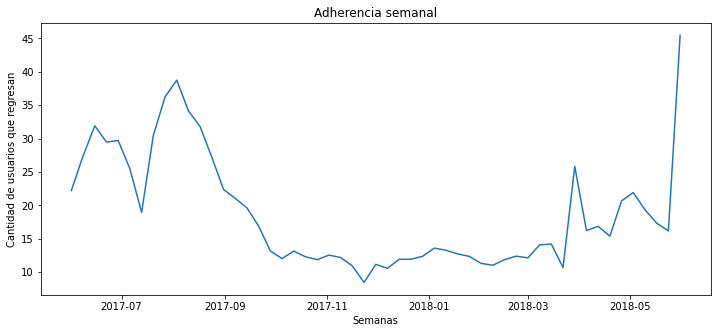

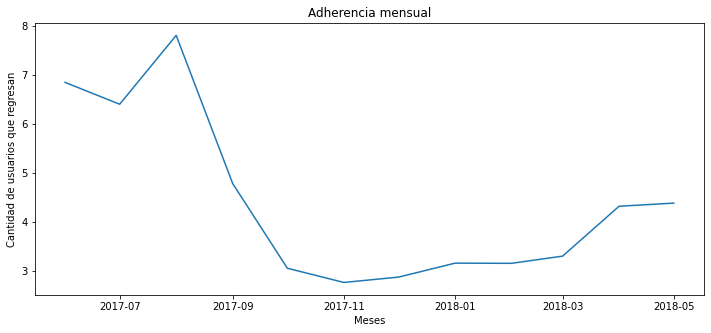

In [21]:
#Graficando el factor de adherencia semanal
wau_total['stickyfactor_weekly'] = (dau_mean / wau_total['users']) * 100
plt.figure(figsize=(12,5))
plt.plot(wau_total['session_week'],wau_total['stickyfactor_weekly'])
plt. title("Adherencia semanal")
plt. xlabel("Semanas")
plt. ylabel("Cantidad de usuarios que regresan")

#Graficando el factor de adherencia mensual
mau_total['stickyfactor_monthly'] = (dau_mean / mau_total['users']) * 100
plt.figure(figsize=(12,5))
plt.plot(mau_total['session_month'],mau_total['stickyfactor_monthly'])
plt. title("Adherencia mensual")
plt. xlabel("Meses")
plt. ylabel("Cantidad de usuarios que regresan")

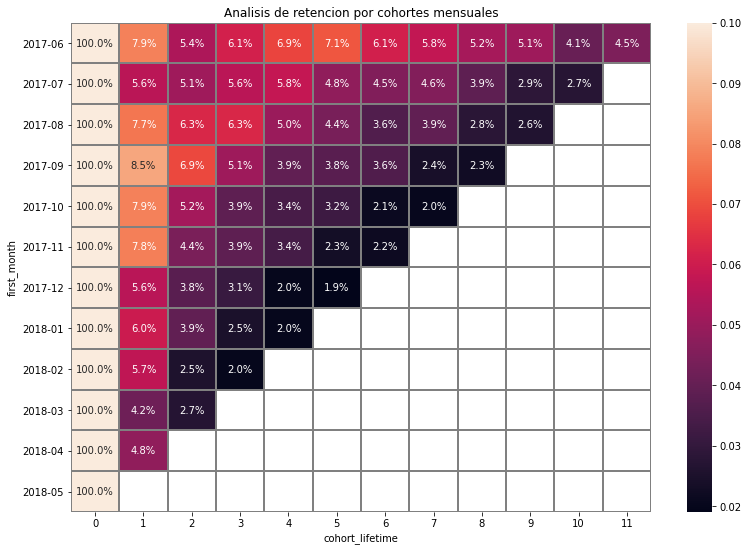

In [22]:
#Analisis de retencion por cohortes mensuales
first_order_date = visits.groupby('user_id').agg({'start_date':'min'}).reset_index()
first_order_date.columns = ['user_id','first_order_date']

user_visits = visits.merge(first_order_date, on='user_id')
user_visits['order_month'] = user_visits['start_date'].astype('datetime64[M]')
user_visits['first_month'] = user_visits['first_order_date'].astype('datetime64[M]')

user_visits['cohort_lifetime'] = ( user_visits['order_month'] - user_visits['first_month'] ) 
user_visits['cohort_lifetime'] = (user_visits[ 'cohort_lifetime' ] / np.timedelta64(1, 'M'))
user_visits['cohort_lifetime'] = (user_visits[ 'cohort_lifetime' ].round().astype('int', errors='ignore'))

cohorts = (user_visits.groupby(['first_month', 'cohort_lifetime']).agg({'user_id': 'nunique'}).reset_index())

first_visits_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_month', 'user_id']]
first_visits_count = first_visits_count.rename(columns={'user_id': 'cohort_users'}) 
cohorts = cohorts.merge(first_visits_count, on='first_month')
cohorts['first_month']= cohorts['first_month'].dt.strftime('%Y-%m') 

cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_users'] 

retention_pivot = cohorts.pivot_table(index='first_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
plt.figure(figsize=(13, 9))
plt.title('Analisis de retencion por cohortes mensuales')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1)
plt.show()

Para calcular que tan frecuentemente regresan los usuario s de Y.Afisha calculamos el factor de adherencia semanal y mensual, que nos indica el grado de fidelidad de los clientes.

* Segun esta metrica, el 16% de los usuarios regresa semanalmente , mientras que el 4% lo hace mensualmente.
* Basandonos en el mapa de calor generado podemos concluir que en junio 2017 hubo la mayor tasa de retencion en 11 meses y en Mayo 2018 la menor.
* Despues del mes 0 del ciclo de vida, la retencion de todas las cohortes descendio y es inferior a un 10%.

## **Ventas**

### ¿Cuándo la gente empieza a comprar?

In [23]:
#Calculando la duración de las compras

#obtenemos la fecha de la primera compra
first_orders = orders.groupby('user_id').agg({'order_date': 'min'}).reset_index()
first_orders.columns = ['user_id', 'first_order_date']
#obtenemos la fecha de la primera sesion
first_sessions = visits.groupby('user_id').agg({'start_date':'min'}).reset_index()
first_sessions.columns= ['user_id','first_session_date']
#uniendo ambas tablas
conversion = pd.merge(first_orders, first_sessions, how='left', on='user_id')

#calculamos la diferencia entre la primera visita y la primera compra para cada usuario
conversion['duration'] = (conversion['first_order_date'] - conversion['first_session_date']).dt.days

In [24]:
print('Generalmente la gente comienza a comprar a los '+ str(round(int(conversion['duration'].mode()))) + ' dias')

Generalmente la gente comienza a comprar a los 0 dias


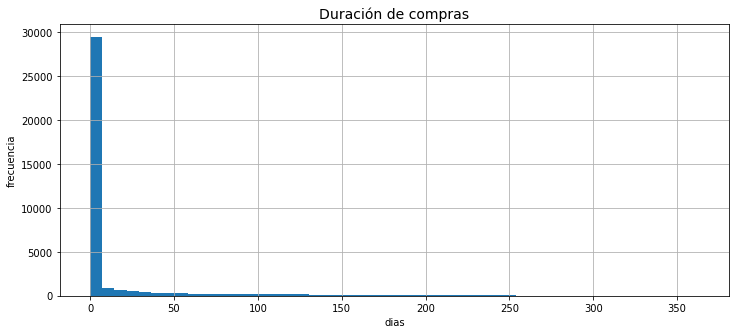

In [25]:
#graficamos
conversion['duration'].hist(figsize=(12,5), bins =50)
plt.title('Duración de compras', fontdict={"size":14})
plt.xlabel('dias')
plt.ylabel('frecuencia')
plt.show()

Casi todos los usuarios concretan una compra el mismo día que realiza su primera sesión. Esto es probablemente que la primera sesión se genera al registrarse, lo cuál suele ser un requisito para realizar compras, esto indicaría que los usuarios de Y.afisha suelen registrarse solo cuando ya deciden realizar una compra.

### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [26]:
#Analisis de pedidos por cohortes mensuales
#first_order_date = orders.groupby('user_id').agg({'order_date':'min'}).reset_index()
# first_order_date.columns = ['user_id','first_order_d']

# orders_ = pd.merge(orders, first_order_date, on='user_id')

# orders_['first_order_month'] = orders_['first_order_d'].astype('datetime64[M]')
# orders_['order_month'] = orders_['order_date'].astype('datetime64[M]')

# orders_['cohort_lifetime']=(orders_['order_month'] - orders_['first_order_month']) 
# orders_['cohort_lifetime']= orders_['cohort_lifetime'] / np.timedelta64(1, 'M')
# orders_['cohort_lifetime']= orders_['cohort_lifetime'].round().astype('int', errors='ignore')
# orders_['first_order_month'] = orders_['first_order_month'].dt.strftime('%Y-%m') 

# orders_count_by_cohorts = orders_.groupby(['first_order_month', 'cohort_lifetime']).agg({'order_date': 'count', 'user_id': 'nunique'})

# orders_count_by_cohorts['orders_per_buyer'] = (orders_count_by_cohorts['order_date']/ orders_count_by_cohorts['user_id']) 
# orders_pivot=orders_count_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='orders_per_buyer',aggfunc='mean')

# plt.figure(figsize=(13, 9))
# sns.heatmap(orders_pivot,annot=True,fmt='.1f',linewidths=1, linecolor='gray', vmin=1.5, vmax= 3.8) 
# plt.title('Pedidos realizados por cohortes mensuales')
# plt.show()

In [27]:
first_order_date = orders.groupby('user_id').agg({'order_date':'min'}).reset_index()
first_order_date.columns = ['user_id','first_order_d']

orders_ = pd.merge(orders, first_order_date, on='user_id', how='inner')
orders_.head()

,order_date,revenue,user_id,first_order_d
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [28]:
#Agregando el mes del primer pedido a la tabla de ordenes
orders_['first_order_month'] = orders_['first_order_d'].astype('datetime64[M]')
#Calculando el tamaños de cohortes
cohort_size= orders_.groupby('first_order_month').user_id.nunique().reset_index()
cohort_size.columns = ['first_order_month','cohort_size']
cohort_size.head()

,first_order_month,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [29]:
# Creando una columna de mes para la tabla de pedidos
orders_['order_month'] = orders_['order_date'].astype('datetime64[M]')

# Creando la tabla de cohortes
cohort = orders_.groupby(['first_order_month','order_month']).revenue.count().reset_index()
cohort.columns = ['first_order_month','order_month','orders']

# Merge con la tabla de cohort_size
cohort = cohort.merge(cohort_size, on='first_order_month')
cohort['cohort_lifetime'] = ((cohort['order_month'] - cohort['first_order_month']) / np.timedelta64(1,'M')).round()
cohort['orders_per_buyer'] = cohort['orders'] / cohort['cohort_size']
cohort['first_order_month'] = cohort['first_order_month'].dt.strftime('%Y-%m') 
cohort.head()

,first_order_month,order_month,orders,cohort_size,cohort_lifetime,orders_per_buyer
0,2017-06,2017-06-01,2354,2023,0.0,1.163618
1,2017-06,2017-07-01,177,2023,1.0,0.087494
2,2017-06,2017-08-01,174,2023,2.0,0.086011
3,2017-06,2017-09-01,226,2023,3.0,0.111715
4,2017-06,2017-10-01,292,2023,4.0,0.144340


In [30]:
#Creando una tabla dinámica para ver los pedidos por cohorte
orders_pivot = cohort.pivot_table(index='first_order_month',values='orders_per_buyer',columns='cohort_lifetime',aggfunc='sum')
orders_pivot.round(2).fillna('')

cohort_lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06,1.16,0.09,0.09,0.11,0.14,0.11,0.14,0.09,0.1,0.08,0.05,0.04
2017-07,1.14,0.05,0.06,0.05,0.04,0.04,0.03,0.03,0.03,0.01,0.03,
2017-08,1.12,0.08,0.07,0.06,0.06,0.05,0.04,0.06,0.03,0.03,,
2017-09,1.14,0.08,0.06,0.06,0.03,0.04,0.04,0.02,0.02,,,
2017-10,1.14,0.07,0.04,0.03,0.03,0.02,0.02,0.03,,,,
2017-11,1.18,0.1,0.04,0.05,0.03,0.01,0.02,,,,,
2017-12,1.15,0.06,0.05,0.04,0.02,0.02,,,,,,
2018-01,1.12,0.07,0.05,0.02,0.02,,,,,,,
2018-02,1.12,0.06,0.02,0.02,,,,,,,,


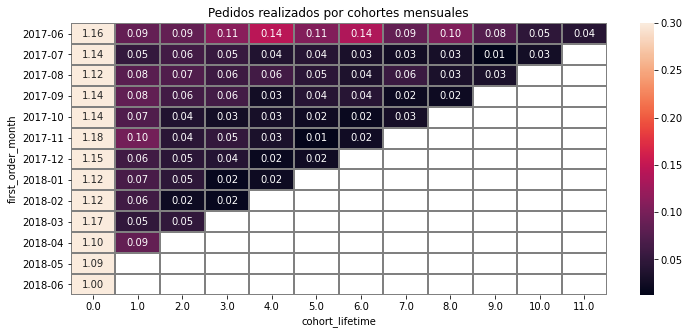

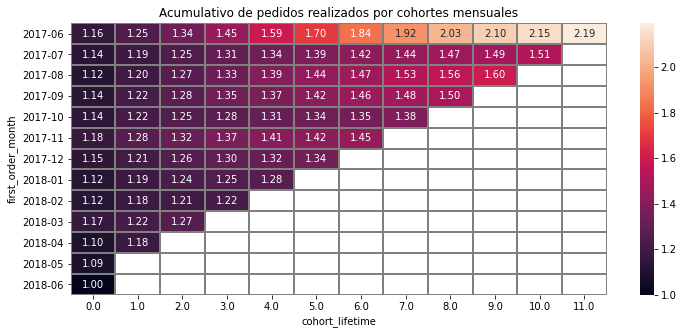

In [31]:
#graficamos los pedidos por cohorte en un heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(orders_pivot,annot=True,fmt='.2f',linewidths=1, linecolor='gray', vmax= 0.3) 
plt.title('Pedidos realizados por cohortes mensuales')
plt.show()
#graficamos el acumulativo para diferenciar los cohortes con más pedidos
plt.figure(figsize=(12, 5))
sns.heatmap(orders_pivot.cumsum(axis=1),annot=True,fmt='.2f',linewidths=1, linecolor='gray') 
plt.title('Acumulativo de pedidos realizados por cohortes mensuales')
plt.show()

* Podemos ver que las cohortes realizan sus compras cuando se registran y el número de compras por cada usuario disminuye drásticamente con el tiempo.
* En general, el cohorte del 06/2017 es el que ha realizado más pedidos pero es también el que tiene el ciclo de vida más largo.

### ¿Cuál es el tamaño promedio de compra?

In [32]:
print('Ingresos totales: '+ str(orders['revenue'].sum().round(decimals=2)))
print('Tamaño medio de compras: '+ str(orders['revenue'].mean().round(decimals=2)))

Ingresos totales: 252057.2
Tamaño medio de compras: 5.0


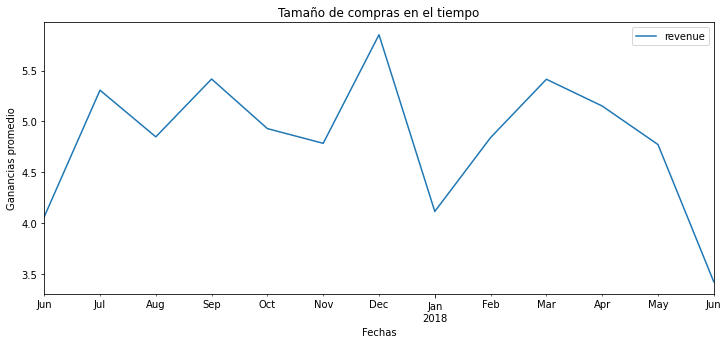

In [33]:
orders_.groupby('order_month').agg({'revenue': 'mean'}).plot(kind = 'line', figsize=(12,5))
plt.title('Tamaño de compras en el tiempo')
plt.xlabel('Fechas')
plt.ylabel('Ganancias promedio')
plt.show()

* El tamaño promedio de compra es de $5.
* En Noviembre 2017 hay una gran alza seguida de una gran baja en enero 2018, probablemente por los gastos realizados para fiestas navideñas.

In [34]:
# orders_revenue_by_cohorts = orders_.groupby(['first_order_month', 'cohort_lifetime']).agg({'revenue': 'sum', 
#                                                                                           'user_id': 'nunique'})
# orders_revenue_by_cohorts['revenue_per_user'] = (orders_revenue_by_cohorts['revenue']/orders_revenue_by_cohorts['user_id']) 
# revenue_pivot=orders_revenue_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',
#                                                     values='revenue_per_user',aggfunc='mean') 
# plt.figure(figsize=(12, 5))
# plt.title('Mapa de calor LTV por cohortes mensuales')
# sns.heatmap(revenue_pivot, annot=True, fmt='.1f',linewidths=1, linecolor='gray', vmax= 60) 
# plt.show();

### ¿Cuánto dinero traen? (LTV)

El LTV del primer cohorte es : 102.3689520514088


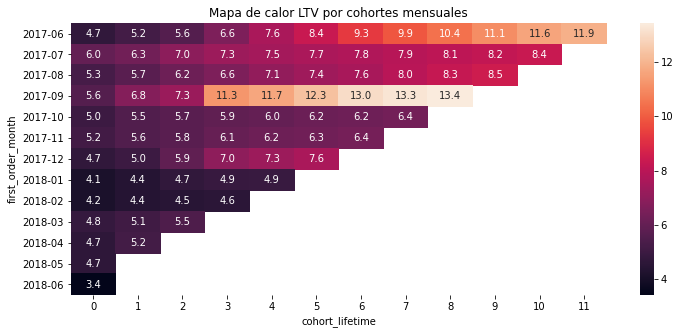

In [35]:
#Para saber cuanto dinero traen los clientes calcularemos el LTV(lifetime value) por cohortes

margin_rate = 1
cohort_sizes = orders_.groupby('first_order_month').agg({'user_id': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
ltv_cohort=orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, ltv_cohort, on='first_order_month')
report['first_order_month'] = report['first_order_month'].astype('datetime64[M]')
report['gp'] = report['revenue'] * margin_rate
report['cohort_lifetime'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['cohort_lifetime'] = report['cohort_lifetime'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']

report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m') 

output = report.pivot_table(index='first_order_month', columns='cohort_lifetime', values='ltv', aggfunc='mean').cumsum(axis=1)
output.round(2).fillna('')

ltv_201706 = output.loc['2017-06'].sum()

print('El LTV del primer cohorte es :', ltv_201706)

plt.figure(figsize=(12, 5))
plt.title('Mapa de calor LTV por cohortes mensuales')
sns.heatmap(output, annot=True, fmt='.1f')
plt.show();

El LTV (lifetime value en inglés) es el valor "de vida" del cliente. Es la cantidad total de dinero que un cliente aporta a la empresa en promedio al realizar compras. Es una estimación de los ingresos medios que generará un cliente a lo largo de su vida como tal. 

Para calcular el LTV debemos tener en cuenta los ingresos/ganancias brutas de un comprador por periodo. Para ello, primero agrupamos los datos por usuarios 'first_order_month' y por mes de compra 'order_month'. Trazamos una tabla dinámica que mostraba el cambio en los ingresos por cohorte según el mes de compra y luego calculamos el LTV.

* El cohorte de junio 2017, el que tiene el ciclo de vida más largo en nuestros datos, tiene un LTV total de 102.37, lo que quiere decir que en promedio cada cliente de la primera cohorte genero 102.37 de ingresos durante su ciclo de vida de 12 meses.
* El cohorte de septiembre 2017 tiene una tendencia a tener un LTV mucho mayor que el resto desde su cuarto mes de ciclo de vida.
* Los cohortes de abril, mayo y junio 2017 son los que tienen el LTV más bajo.


## **Marketing**

### ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)

In [36]:
# Calculando gastos totales
print('Los gastos totales en marketing fueron de $' + str(costs['ad_cost'].sum()))

Los gastos totales en marketing fueron de $329131.62


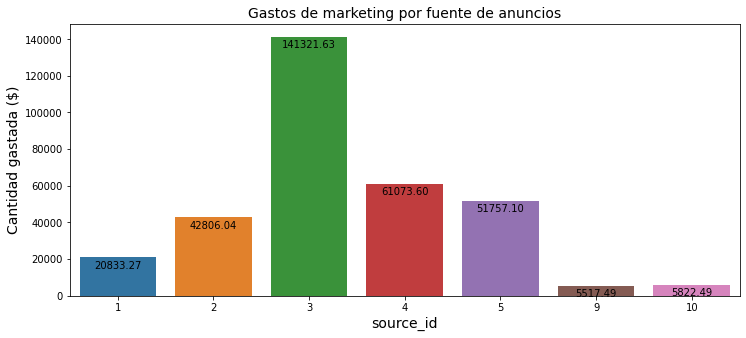

In [37]:
#Calculando gastos por fuente
cost_per_source = costs.groupby('source_id').agg({'ad_cost':'sum'}).reset_index()
cost_per_source.columns = ['source_id','total_cost']
#Graficando gastos por fuente
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
splot=sns.barplot(y='total_cost', x= 'source_id', data=cost_per_source)  
ax.set_title('Gastos de marketing por fuente de anuncios', fontdict={"size":14})
plt.xlabel('source_id', fontdict={"size":14})
plt.ylabel('Cantidad gastada ($)', fontdict={"size":14})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext= (0, -8), 
                   textcoords = 'offset points')

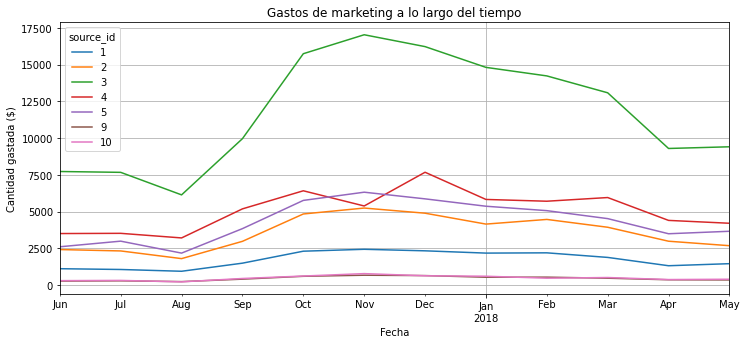

In [38]:
#gastos a lo largo del tiempo
costs['month'] = costs['ad_date'].astype('datetime64[M]')
costs_overtime = costs.groupby(['month','source_id']).agg({'ad_cost':'sum'})
costs_overtime = costs_overtime.pivot_table(index = ['month'], columns = 'source_id', 
                                            values = 'ad_cost', aggfunc = 'mean').plot(grid = True, figsize = (12, 5))
plt.title('Gastos de marketing a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad gastada ($)')
plt.show()

* Los gastos totales de marketing fueron de 329131.62
* De un total de 7 fuentes de anuncios, la fuente con 'source_id' 3 es la que más gasto con un total de 141321.63.
* Las fuentes 9 y 10 fueron los que generaron menos gastos de marketing.
* Se suele gastar menos en Abril a Agosto y más en Octubre a Enero.

### ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

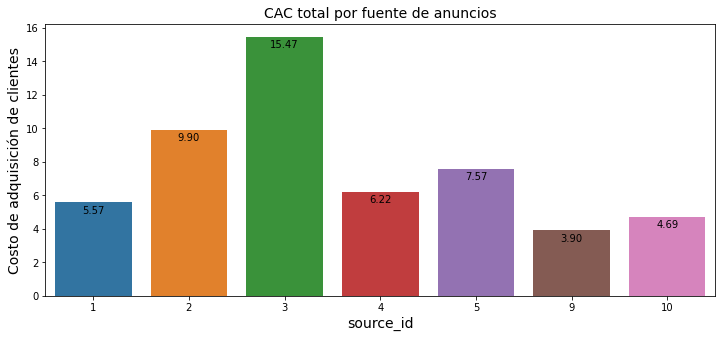

In [39]:
#CAC (costo de adquisición de clientes) por fuente de anuncios

user_withsource = visits[['user_id', 'source_id','session_month']]

user_withsource= user_withsource.drop_duplicates(subset=['user_id'], keep='first')

orders_ = orders_.merge(user_withsource, on= 'user_id')
cac_cohort = orders_.groupby(['source_id'], as_index=False).agg({'user_id':'nunique'}).rename(columns={'user_id':'buyers', 'source_id': 'source_id'})
source_costs = costs.groupby('source_id').agg({'ad_cost': 'sum'}).reset_index()

cac_bysource = cac_cohort.merge(source_costs, on='source_id')

cac_bysource['cac'] = cac_bysource['ad_cost'] / cac_bysource['buyers']

fig, ax = plt.subplots()
fig.set_size_inches(12,5)
splot=sns.barplot(y="cac", x= "source_id", data=cac_bysource.sort_values(ascending =False, by= "cac" ))  
ax.set_title("CAC total por fuente de anuncios", fontdict={"size":14})
plt.xlabel("source_id", fontdict={"size":14})
plt.ylabel("Costo de adquisición de clientes", fontdict={"size":14})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext= (0, -8), 
                   textcoords = 'offset points')
plt.show()

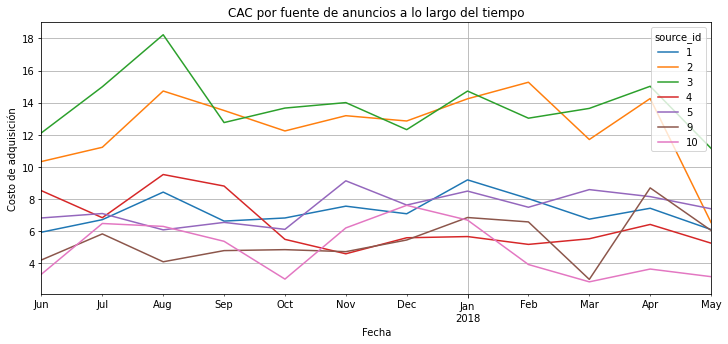

In [40]:
first_source=visits.sort_values('start_date').groupby('user_id').agg({'source_id': 'first'}).reset_index()
first_source.columns=['user_id','first_source']

marketing_by_month_source = costs.groupby(['month','source_id'])['ad_cost'].sum().reset_index()

orders_ = orders_.merge(first_source, how='left', on='user_id')

buyers_per_month_source = orders_.groupby(['first_order_month','first_source'])['user_id'].nunique().reset_index()
buyers_per_month_source.columns = ['month','source_id','buyers']
buyers_per_month_source['month'] = buyers_per_month_source['month'].astype('datetime64[M]')

CAC_per_month_source = marketing_by_month_source.merge(buyers_per_month_source,how='left',on=['month','source_id'])

CAC_per_month_source['CAC']=CAC_per_month_source['ad_cost']/CAC_per_month_source['buyers']

CAC_per_month_source.pivot_table(index=["month"], columns= "source_id", 
                                 values="CAC", aggfunc="mean").plot(grid = True, figsize = (12, 5))
plt.title('CAC por fuente de anuncios a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Costo de adquisición')
plt.show()

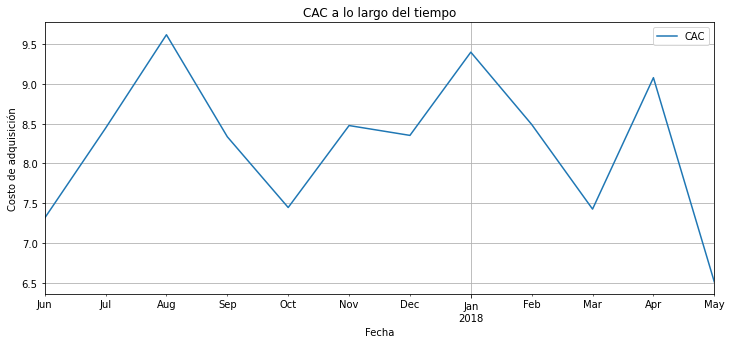

In [41]:
CAC_per_month_source.pivot_table(index=["month"], 
                                 values="CAC", aggfunc="mean").plot(grid = True, figsize = (12, 5))
plt.title('CAC a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Costo de adquisición')
plt.show()

El CAC (costo de adquisición de clientes) es el costo de atraer a cada cliente: el dinero que un/a nuevo/a cliente/a le cuesta a una empresa. Se calcula como los gastos de marketing divididos por el número de clientes.

* El costo de adquisición de clientes para la fuente con source_id 3 es la más cara con un valor de 15.47.
* Las fuente 9 y 10 son las que tienen el menor costo de adquisición total.
* El costo por adquisición aumento en los meses de agosto, enero y abril, mientras que descendieron para octubre, marzo y mayo. Esto probablemente dependa de las campañas de marketing estacionales

### ¿Cuán rentables eran las inversiones? (ROMI)

In [42]:
costs_by_month = costs.pivot_table(index = 'month', values = 'ad_cost', aggfunc = 'sum').reset_index()
costs_by_month.columns = ['first_order_month', 'costs']
costs_by_month = costs_by_month.set_index('first_order_month')
report['first_order_month'] = report['first_order_month'].astype('datetime64[M]')
report_ = report.merge(costs_by_month, on = 'first_order_month')
report_['first_order_month'] = report_['first_order_month'].dt.strftime('%Y-%m') 
#ROMI = LTV / CAC
report_['cac'] = report_['costs'] / report_['n_buyers']
report_ = report_[:-1]
report_['roi'] = report_['ltv'] / report_['cac']
report_ = report_.reset_index(drop=True)
report_.head()

,first_order_month,n_buyers,order_month,revenue,gp,cohort_lifetime,ltv,costs,cac,roi
0,2017-06,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.0,8.905091,0.530530
1,2017-06,2023,2017-07-01,981.82,981.82,1,0.485329,18015.0,8.905091,0.054500
2,2017-06,2023,2017-08-01,885.34,885.34,2,0.437637,18015.0,8.905091,0.049145
3,2017-06,2023,2017-09-01,1931.30,1931.30,3,0.954671,18015.0,8.905091,0.107205
4,2017-06,2023,2017-10-01,2068.58,2068.58,4,1.022531,18015.0,8.905091,0.114825


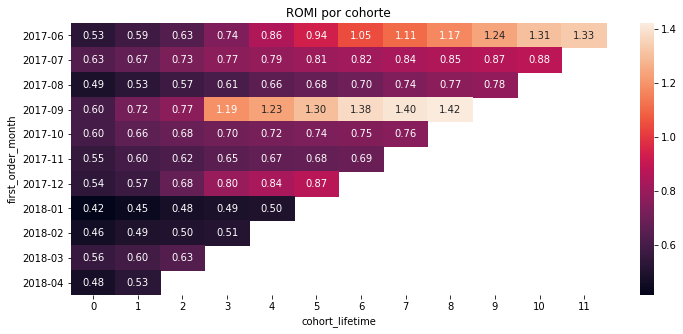

In [43]:
roi = report_.pivot_table(index = 'first_order_month', columns = 'cohort_lifetime', values = 'roi', aggfunc = 'mean')
roi = roi.cumsum(axis=1)
roi = roi.reset_index()
roi = roi.set_index('first_order_month')

plt.figure(figsize=(12, 5))
plt.title('ROMI por cohorte')
sns.heatmap(roi, annot=True, fmt=".2f")
plt.xlabel('cohort_lifetime')
plt.ylabel('first_order_month')
plt.show() 

El ROMI (retorno de la inversión en marketing) mide la efectividad del conjunto de las actividades de marketing realizadas por una empresa. El ROMI se calcula dividiendo el beneficio bruto de la campaña/gastos, osea el LTV/CAC.

* Según el gráfico del mapa de calor anterior, la cohorte de septiembre de 2017 tuvo el mayor retorno de la inversión, seguida de la cohorte de junio de 2017.
* La mayoria de las cohortes no ha compensado el dinero invertido, exceptuando por los cohortes del 2017-06 que comenzó a generar ganancias a su sexto mes de vida y el cohorte del 2017-09 que comenzó a generar ganancias en su tercer mes de vida.

/tmp/ipykernel_202/1202884848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ltv_per_source = orders_.groupby(['first_source'])['user_id','revenue'].agg({'user_id':'nunique','revenue':'sum'}).reset_index()


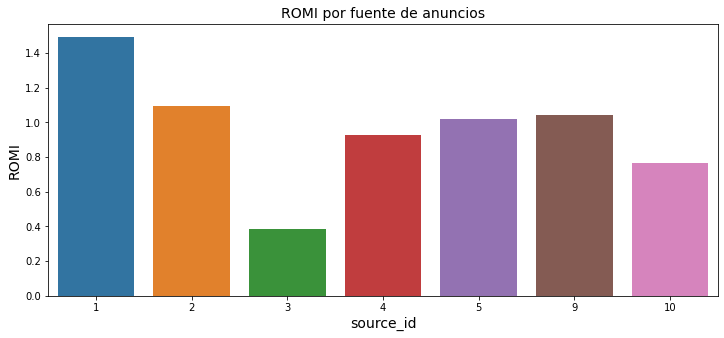

In [44]:
#ROMI por fuente de anuncios
ltv_per_source = orders_.groupby(['first_source'])['user_id','revenue'].agg({'user_id':'nunique','revenue':'sum'}).reset_index()
ltv_per_source.columns=['source_id','buyers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']
ltv_per_source

source_costs=costs.groupby('source_id').agg({'ad_cost': 'sum'}).reset_index()
source_costs.columns = ['source_id', 'overall cost']

roi_per_source=source_costs.merge(ltv_per_source,on=['source_id'])
roi_per_source['cac']=roi_per_source['overall cost']/roi_per_source['buyers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['cac']

fig, ax = plt.subplots()
fig.set_size_inches(12,5)
splot=sns.barplot(y='romi', x= 'source_id', data=roi_per_source )  
ax.set_title("ROMI por fuente de anuncios", fontdict={"size":14})
plt.xlabel("source_id", fontdict={"size":14})
plt.ylabel("ROMI", fontdict={"size":14})
plt.show()

* Las fuentes de anuncio con source_id 3,4 y 10 no han logrado generar ganancias en el año que tenemos de datos.
* La fuente de anuncios 1 es la más rentable de todas.

In [45]:
#Calculamos los costos totales por fuente por cada mes
orders_['cohort_lifetime'] = ((orders_['order_month'] - orders_['first_order_month'])
                              / np.timedelta64(1, 'M')).round().astype(int)
orders_df = orders_[['user_id', 'revenue', 'first_order_month', 'cohort_lifetime', 'first_source']]
orders_df = orders_df.groupby(['cohort_lifetime', 'first_source', 'first_order_month']).agg({'user_id':'nunique', 'revenue':'sum'}).reset_index()
costs_df = costs[['source_id', 'month', 'ad_cost']]
costs_df = costs_df.groupby(['source_id', 'month']).agg({'ad_cost':'sum'}).reset_index()

In [46]:
#calculamos el ltv
co = report[['first_order_month', 'cohort_lifetime', 'n_buyers']]
ltv_cohorts = orders_df.merge(co, on=['first_order_month', 'cohort_lifetime'], how='left')
ltv_cohorts['ltv'] = ltv_cohorts['revenue']/ltv_cohorts['n_buyers']

In [47]:
#unimos nuestras tablas para poder calcular el romi posteriormente
costs_df = costs_df.rename(columns={'month': "first_order_month"})
ltv_cohorts = ltv_cohorts.rename(columns={'first_source': "source_id"})
roi_cohorts = costs_df.merge(ltv_cohorts, on=['first_order_month', 'source_id'], how='left')

In [48]:
#calculamos el cac y romi
roi_cohorts['cac'] = roi_cohorts['ad_cost']/roi_cohorts['n_buyers']
roi_cohorts['roi'] = roi_cohorts['ltv']/roi_cohorts['cac']
roi_cohorts.head()

,source_id,first_order_month,ad_cost,cohort_lifetime,user_id,revenue,n_buyers,ltv,cac,roi
0,1,2017-06-01,1125.61,0,190,1378.70,2023,0.681513,0.556406,1.224847
1,1,2017-06-01,1125.61,1,16,414.98,2023,0.205131,0.556406,0.368671
2,1,2017-06-01,1125.61,2,10,419.43,2023,0.207331,0.556406,0.372625
3,1,2017-06-01,1125.61,3,9,714.24,2023,0.353060,0.556406,0.634536
4,1,2017-06-01,1125.61,4,12,811.20,2023,0.400989,0.556406,0.720676


In [49]:
#creamos una funcion para crear un heatmap para cada fuente
def roi_source(x, y):
    so_roi = roi_cohorts.query(x).pivot_table(
        index='first_order_month' , columns='cohort_lifetime', values='roi', aggfunc='mean'
    ).cumsum(axis=1).round(2)
    so_roi.index = so_roi.index.astype(str)
    plt.figure(figsize=(12, 5))
    sns.heatmap(so_roi ,annot=True,fmt='.2f',vmin=0, vmax=4)
    plt.title("ROMI para la fuente {} por cohorte".format(y))
    plt.xlabel("cohort_lifetime") 
    plt.ylabel("first_order_month") 
    plt.show()

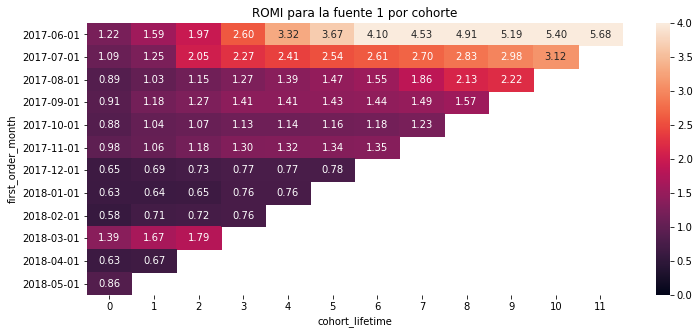

In [50]:
roi_source(x='source_id == 1', y=1)

La mayoria de las cohortes para la fuente 1 consiguieron generar ganancias al primer o segundo mes, solo algunas cohortes como las de 12/2017 al 02/2018 tuvieron una eficiencia menor, sin lograr un retorno de la inversión a la actualidad.

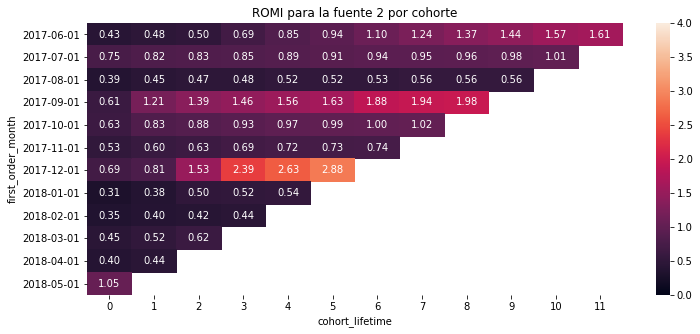

In [51]:
roi_source(x='source_id == 2', y=2)

Para la fuente 2 podemos ver que las cohortes de 09/2017 y 12/2017 fueron los más rentables. Solo la mitad de los cohortes lograron realizar un retorno de la inversion y comenzar a generar ganancias.

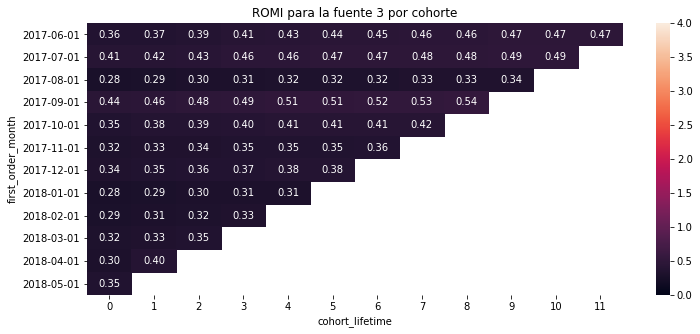

In [52]:
roi_source(x='source_id == 3', y=3)

Tal y como vimos en el grafico, la fuente 3 no ha le ha ido muy bien y no ha logrado realizar un retorno de la inversion para ninguno de los cohortes.

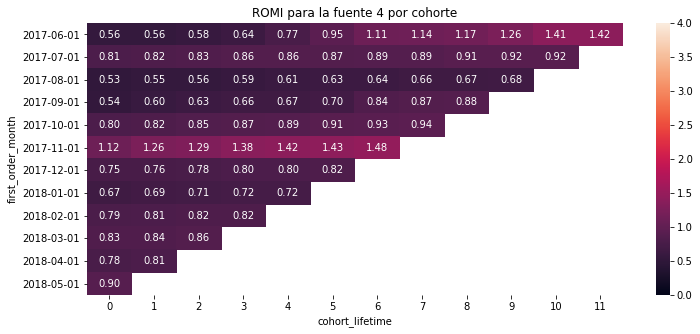

In [53]:
roi_source(x='source_id == 4', y=4)

Solo la cohorte de 06/2017 y 11/2017 lograron un retorno de la inversion para la fuente numero 4. En general no tiene muy buen desempeño.

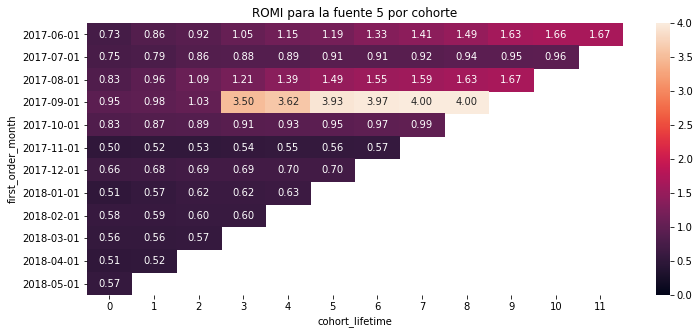

In [54]:
roi_source(x='source_id == 5', y=5)

La cohorte de 09/2017 ha generado muchas ganancias en comparacion con el resto de las cohortes, sería interesante investigar si fue algún tipo de campaña que haya tenido esta fuente como objetivo o que pudo influenciar esto.

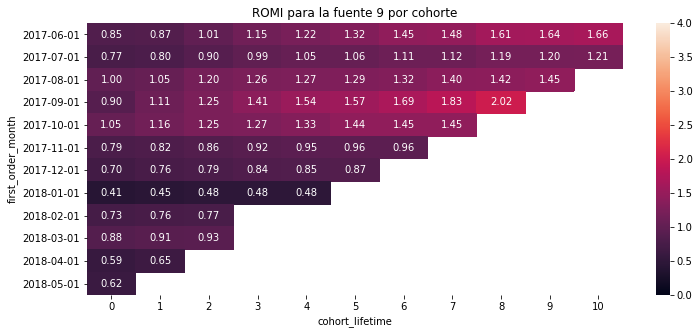

In [55]:
roi_source(x='source_id == 9', y=9)

Las cohortes de la fuente 9 tienen un desempeño similar, exceptuando por el del 01/2018 que pareciera ir po debajo del resto. Por otro lado la cohorte del 09/2017 tiene resultados levemente superiores al resto, duplicando lo invertido en ella.

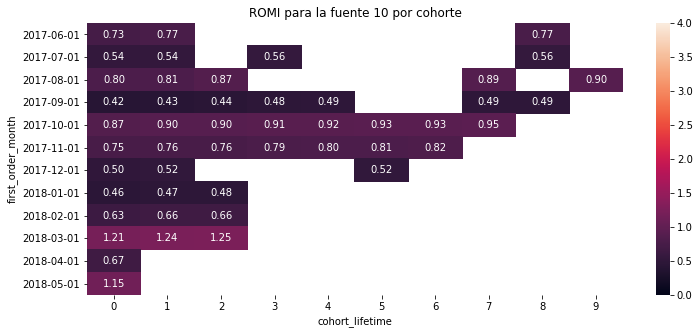

In [56]:
roi_source(x='source_id == 10', y=10)

A la fuente 10 no le va muy bien en general, solo las cohortes de 03/2018 y 05/2018 han logrado un retorno de la inversión.

# Conclusión

Recapitulemos lo que hemos hecho y lo que hay que hacer para optimizar los gastos de marketing.

En primer lugar, analizamos el producto y obtuvimos una imagen de cómo lo utilizan los usuarios: cuántos personas lo usan diariamente, a la semana o al mes, cuánto dura cada sesión y con qué frecuencia.
A continuación, nos centramos en las ventas: cuándo empieza la gente a comprar, cuánto se gastan de media, cuántos pedidos hacen y cuánto dinero traen.
Por último, analizamos nuestro marketing, cuánto gastamos, cuánto nos costó conseguir un solo cliente y cuánto nos compensó.

Tras este análisis obtuvimos los siguientes resultados:

* De media, 909 clientes utilizan Y.Afisha a diario.
 Asimismo, 5724.42 clientes utilizan Y.Afisha cada semana y 23228,42 clientes cada mes. 
* El mayor número de visitas se registró el 24 de noviembre, que fue el Black Friday.
 

* Hay unas 987 sesiones únicas al día. No suele haber mucha diferencia entre la cantidad de sesiones total y los usuarios únicos que se conectan a la web, por lo que usualmente los usuarios de Y.Afisha acceden solo una vez al día a la web, exceptuando por días de alta demanda en los que pareciera haber una diferencia más notable


* La duración media de una sesión es de 300 segundos (5 minutos). En general las sesiones de los clientes de Y.Afisha no suelen ser muy largas.

* Según la métrica del factor de fidelidad, el 16 % de los usuarios vuelve semanalmente, mientras que el 4 % lo hace mensualmente. Del mismo modo, junio de 2017 tiene la tasa de retención más alta de 11 meses. Mayo de 2018 tiene la tasa de retención más baja.


* De media, las personas empiezan a comprar o realizan sus primeros pedidos el mismo día de su primera sesión Yandex.afisha. Esto es probablemente porque la primera sesión se genera al registrarse en la web y que para comprar sea necesario tener una compra, por lo que los clientes de Y.Afisha se registran solo cuando ya tienen decidido realizar una compra.
* Podemos ver que las cohortes realizan sus compras cuando se registran y el número de compras por cada usuario disminuye drásticamente con el tiempo.
* El importe medio de la compra es de unos $5.0 , en Noviembre 2017 hay una gran alza seguida de una gran baja en enero 2018, probablemente por los gastos realizados para fiestas navideñas.
* El valor “de vida” que un cliente aporta a la empresa varía entre 3,4 y 13,4. La cohorte de septiembre de 2017 tuvo el valor de por vida más alto, seguido del cohorte de junio 2017.

* La cantidad total gastada en marketing fue de 329131.62 dólares.La fuente de anuncios con source_id 3 es la que ha generado más gastos. La 9 y 10 son las que han generado menos gastos.
* Se suele gastar menos en Abril a Agosto y más en Octubre a Enero.
* El CAC (costo de adquisición de clientes) de la fuente de anuncios 3 es la que tiene los clientes con mayor costo de adquisición. El costo por adquisición aumento en los meses de agosto, enero y abril, mientras que descendieron para octubre, marzo y mayo. Esto probablemente dependa de las campañas de marketing estacionales

* Según el ROMI, a un año del ciclo de vida de nuestras cohortes, solo los cohortes 2017-06 y 2017-09 han logrado compensar el dinero invertido en ellos. Deberíamos idear una estrategia de marketing mejor para compensar los costes de inversión y analisar porque esos 2 en especifico si lo lograron.

* La fuente número 1 parece ser la más rentable y consistente a traves del tiempo. 


En base a los datos disponibles recomendamos al departamento de Marketing de Y.Afisha:

- Black Friday (24 de noviembre) parece ser una fecha clave para la empresa, invertir en campañas vale la pena.
- El comportamiento comun de los clientes indica que no suelen acceder más de una vez al día a la web, exceptuando por días de alta demanda. Sería recomendable asegurarnos que no es por fallas de nuestros servidores por alta trafico.
- Los clientes de Junio 2017 tienen la tasa de retencion más alta, ¿habremos aplicado alguna campaña especial este mes? Si es así, podríamos considerar repetirla.
- La mayoria de nuestros clientes se registra cuando ya decide realizar una compra, quizas deberíamos añadir beneficios a nuestros clientes para motivarlos a registrarse.
-Es necesario formular una estrategia para compensar los costes de inversión ya que el ROMI indica que la mayoria de los cohortes no han compensado los costos de inversion. Centrarse en la fuente de anuncios parece una buena idea ya que es consistente y tiene buenos resultados.